<a href="https://colab.research.google.com/github/StillWork/ds0315/blob/main/h_82_YOLOv5_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YOLO V5 데이터 개요

### yaml 파일

- 학습 데이터의 경로, 클래스 갯수 및 종류가 적혀있는 파일
- train : 학습 데이터 폴더 경로
- val : 검증 데이터 폴더 경로
- nc : 학습할 클래스 개수
- names : 학습할 클래스 이름

### label 파일(.txt)

- https://github.com/AlexeyAB/Yolo_mark
- https://github.com/tzutalin/labelImg
- 위의 깃허브 링크를 통해 YOLO 데이터 레이블 제작

### 데이터 폴더 구조

- 전체 데이터 폴더
  - 이미지 데이터 폴더
    - train 이미지 데이터 폴더
    - val 이미지 데이터 폴더
  - 텍스트 레이블 폴더
    - train 텍스트 레이블 폴더
    - val 텍스트 레이블 폴더

## YOLOv5 기본설정

In [1]:
# Github에서 YOLOv5 다운로드
!git clone https://github.com/ultralytics/yolov5

# Dependencies 설치
%cd yolov5
%pip install -qr requirements.txt  # install dependencies, 해당 코드를 실행하지 않으면 train.py 파일이 실행되지 않음

Cloning into 'yolov5'...
remote: Enumerating objects: 5770, done.
remote: Total 5770 (delta 0), reused 0 (delta 0), pack-reused 5770
Receiving objects: 100% (5770/5770), 8.25 MiB | 31.40 MiB/s, done.
Resolving deltas: 100% (3944/3944), done.
/content/yolov5
     |████████████████████████████████| 645kB 18.1MB/s 


In [2]:
import torch

# 이미지를 보여주기 위한 라이브러리
from IPython.display import Image

In [3]:
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


## 데이터셋 다운로드(coco128)

- coco128 : COCO train 2017 데이터셋의 처음 128개 이미지 포함
  - 학습 및 테스트에 동일한 128개의 이미지 사용
  - 과적합 현상 발생

In [4]:
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')

# 다운로드 받은 파일을 압축해제하고 압축파일은 삭제
!unzip -q tmp.zip -d ../ && rm tmp.zip

## YOLOv5 학습 예시

### VOLO V5 인자

- img : 이미지 크기
- epochs : 학습 횟수
- data : yaml 파일 경로
- weights : Pre-Trained 모델 파일 경로
- batch-size : 배치 크기
- cfg : 아키텍쳐 yaml 파일 경로
  - yolo v5는 s, m, l, x 4가지 버전 존재
  - s < m < l < x (모델 무게)

In [5]:
# 이미지 크기 : 640
# 배치 크기 : 16
# 학습 횟수 : 3
# 아키텍쳐 yaml : coco128.yaml
# 모델 버전 : yolov5s
# nosave 옵션 : 마지막 checkpoint만 저장(모델 가중치를 중간 저장하지 않음)
# cache 옵션 : 빠른 학습속도를 위한 이미지 캐싱
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --name yolov5s_clothing_detect --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-11-gaff03be torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/coco128.yaml', device='', entity=None, epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov5s_clothing_detect', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5s_clothing_detect', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-04-17 23:12:10.552258: I tensorflow/stream_executor/platform/default/dso

## YOLOv5 학습 결과

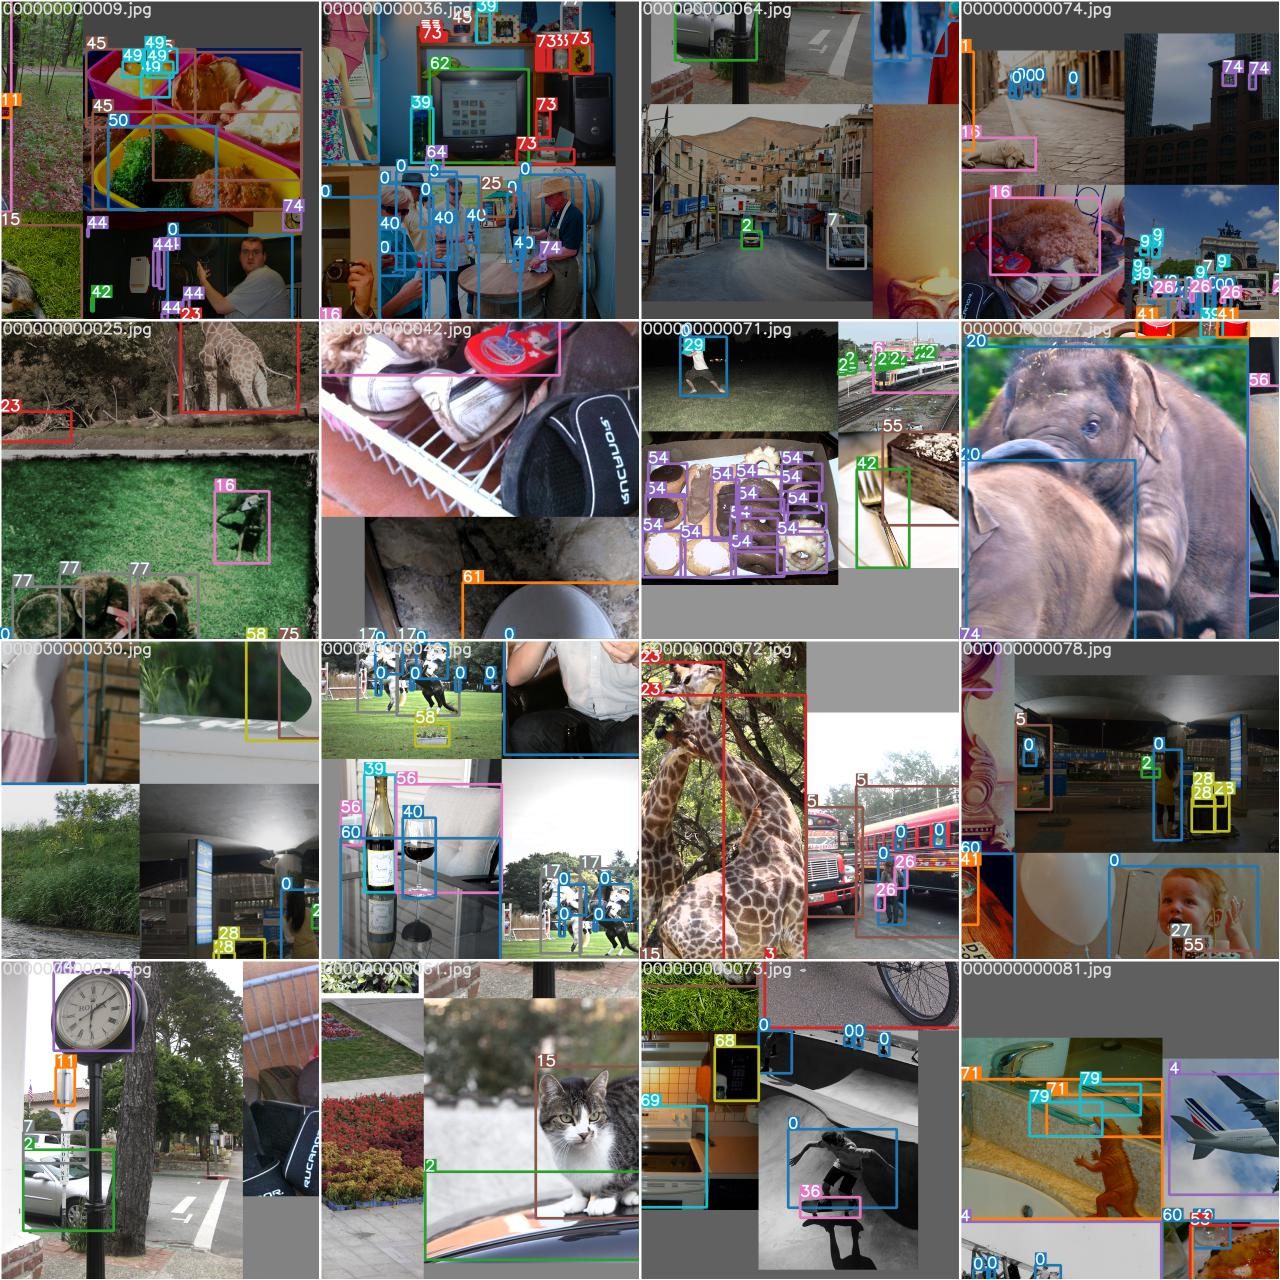

In [6]:
# 각 배치에는 16개의 이미지가 포함되어 있음
# train_batch 이미지 파일에는 객체에 대한 바운딩 박스만 그려져 있음
Image(filename='runs/train/yolov5s_clothing_detect/train_batch0.jpg', width=800)

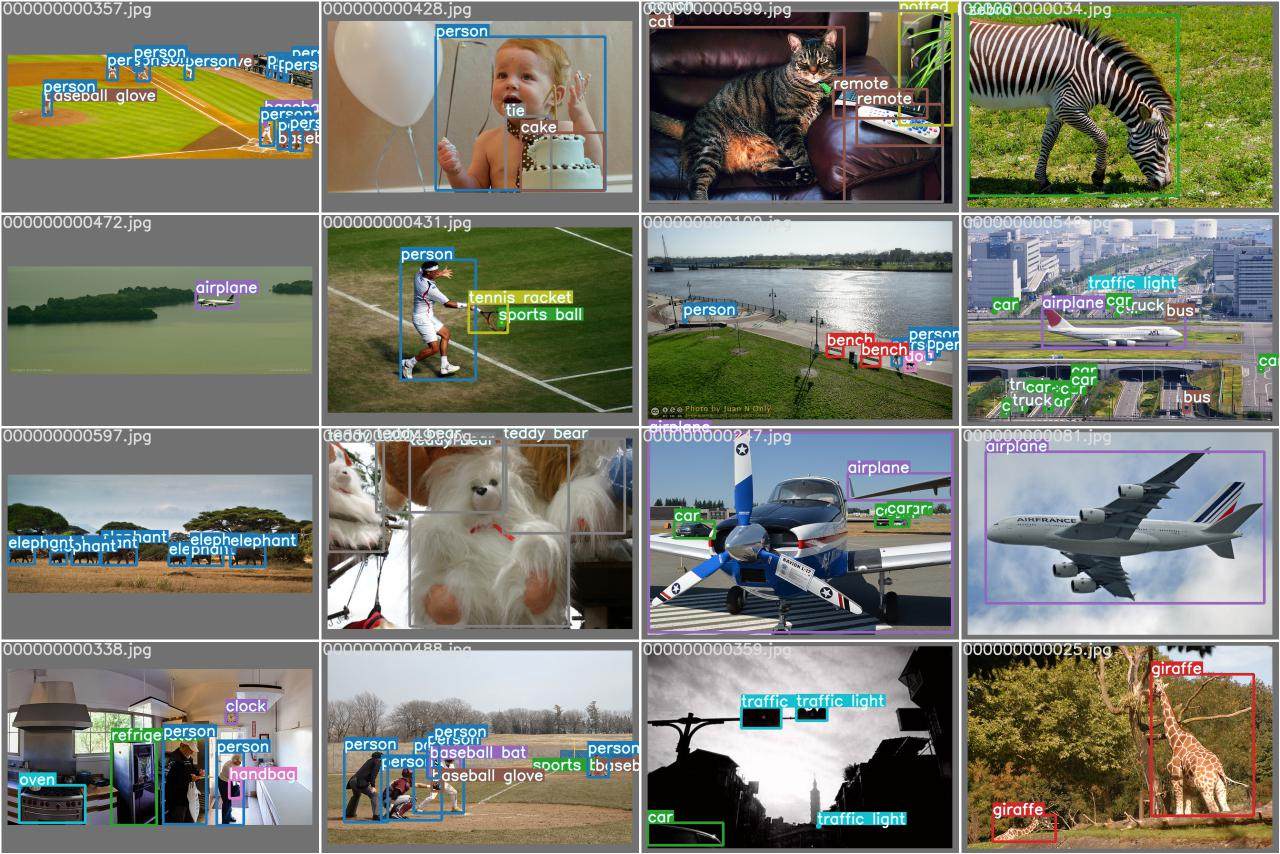

In [7]:
# test_batch_labels 이미지 파일에는 객체에 대한 바운딩 박스에 객체명이 레이블링됨
Image(filename='runs/train/yolov5s_clothing_detect/test_batch0_labels.jpg', width=800)

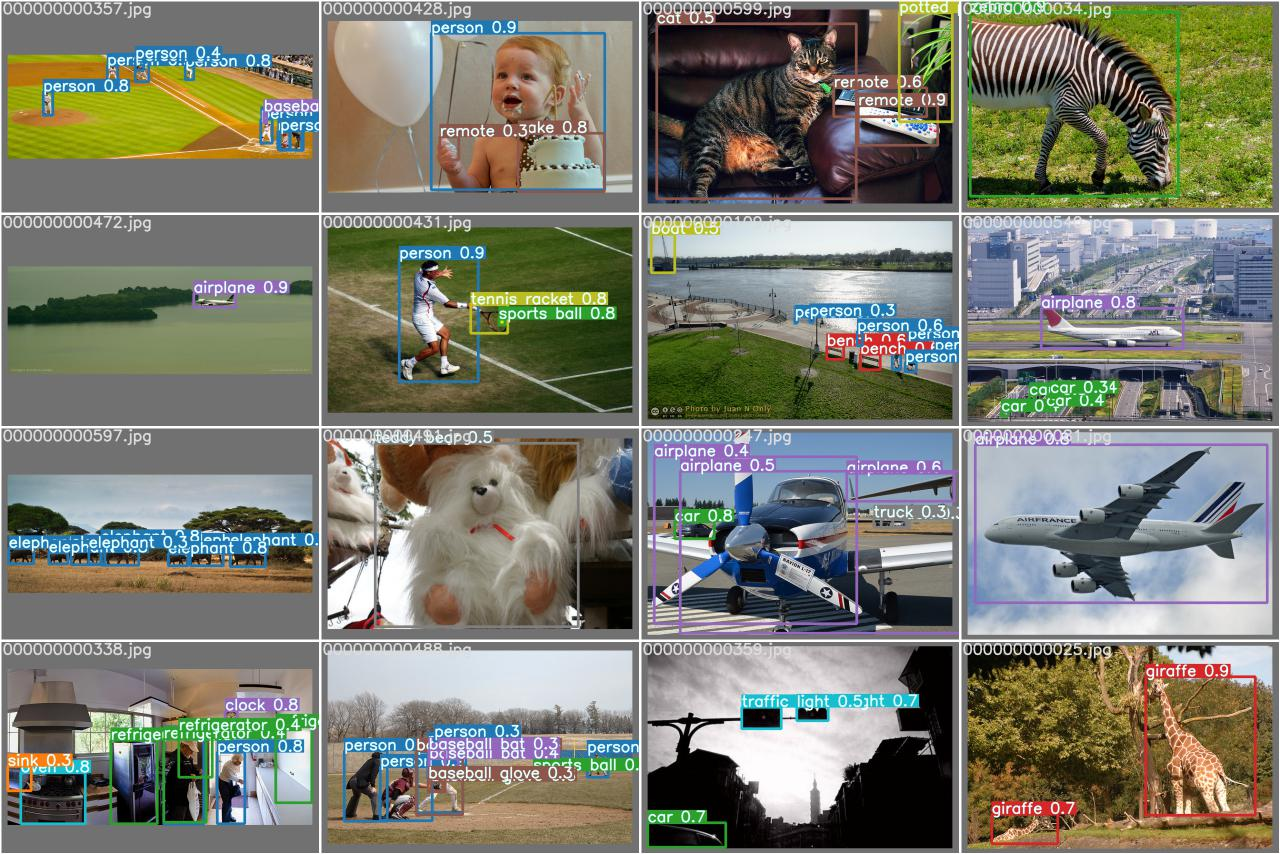

In [8]:
# test_batch_pred 이미지 파일에는 객체에 대한 바운딩 박스에 객체명 및 점수가 포함되어 있음
# 점수는 conf 옵션이 따로 설정되어 있지 않았을 경우, 기본값(0.001)로 설정되어 해당 값보다 작은 점수로 탐지된 객체는 표시되지 않음
Image(filename='runs/train/yolov5s_clothing_detect/test_batch0_pred.jpg', width=800)

## 이미지 테스트

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
YOLOv5 🚀 v5.0-11-gaff03be torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 fire hydrant, Done. (0.011s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.012s)
Results saved to runs/detect/exp
Done. (0.114s)


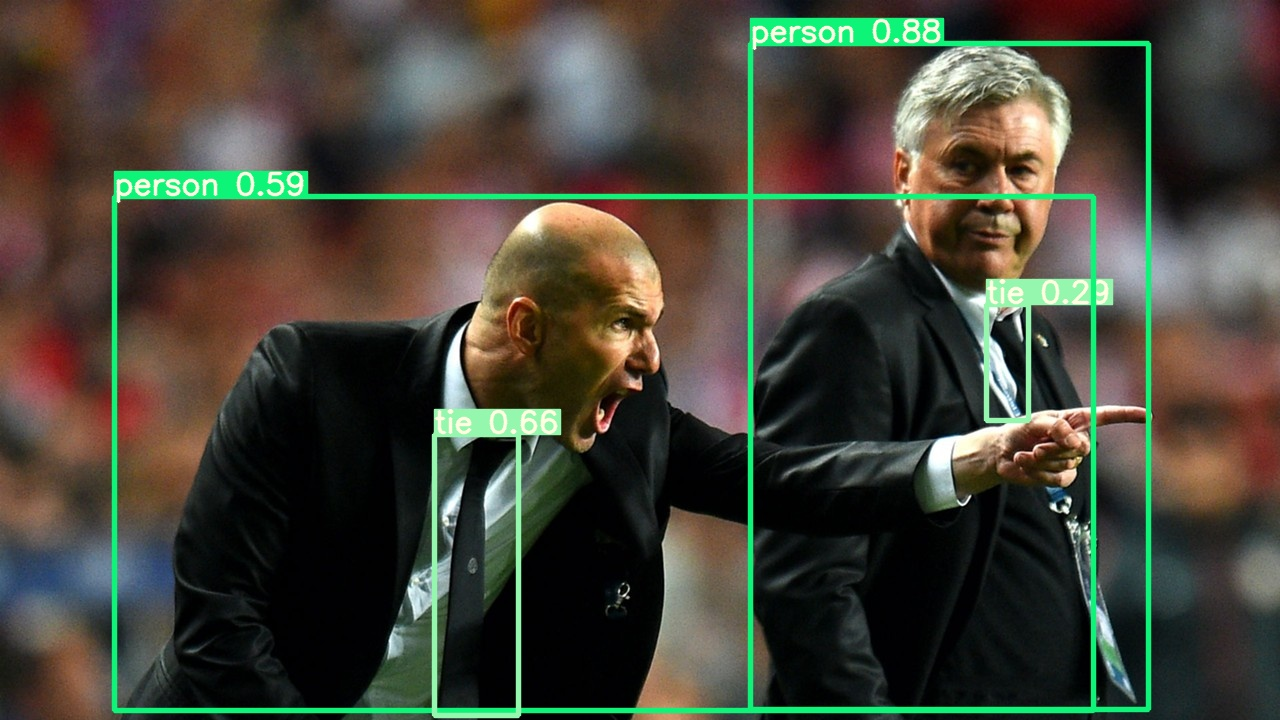

In [9]:
# 학습된 모델(해당 예제에서는 yolo5s.pt)을 가지고 임의의 이미지에 대해서 객체 탐지 수행
# source 옵션은 객체 탐지를 수행할 이미지들이 저장되어 있는 경로
# 아래 코드는 이미지 저장 경로가 data/images로 설정되어 있음
# 객체 탐지 수행 결과는 기본값으로 runs/detect/exp/
# conf 옵션을 0.25로 설정하여 해당 점수보다 낮은 점수를 가진 객체는 바운딩 박스가 표시되지 않음
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

위의 이미지 테스트는 YOLOv5 버전 중 가장 가벼운 모델인 yolov5s을 사용하여 객체 탐지를 수행.

아래의 코드에서 YOLOv5 버전 중 가장 무거운 모델인 yolov5x을 사용하여 객체 탐지 성능 비교.

다운로드 받은 모델은 사전학습이 되어있는 상태.

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp2', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5x.pt'])
YOLOv5 🚀 v5.0-11-gaff03be torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

100% 168M/168M [00:02<00:00, 78.8MB/s]

Fusing layers... 
Model Summary: 476 layers, 87730285 parameters, 0 gradients, 218.8 GFLOPS
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.046s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.028s)
Results saved to runs/detect/exp2
Done. (0.149s)


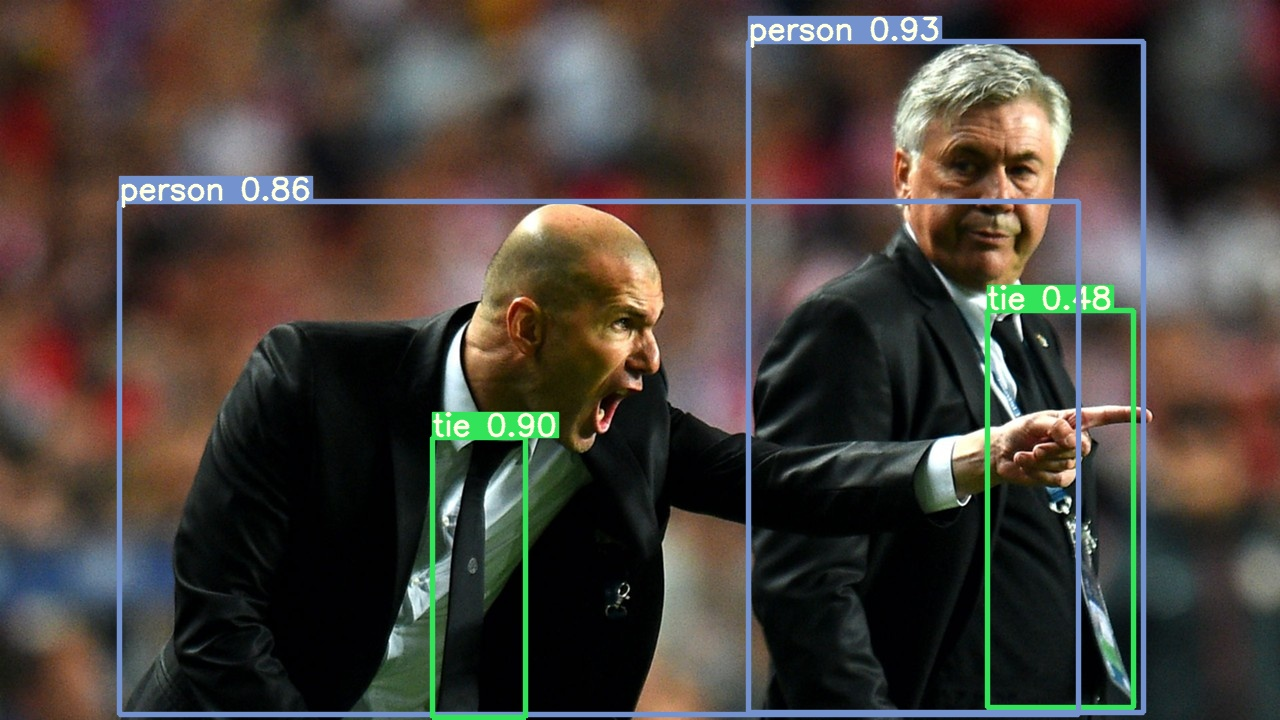

In [10]:
# project 옵션과 name 옵션을 합한 디렉토리 생성
# project 기본값은 runs/detect
# name 기본값 : exp
# 아래 코드에서는 project = default(runs/detect)이고, name = exp2이므로 detect.py를 실행한 결과가 저장되는 경로는 runs/detect/exp2
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source data/images/ --name exp2
Image(filename='runs/detect/exp2/zidane.jpg', width=600)